In [831]:
import numpy as np
from matplotlib import pyplot
from pandas import DataFrame

In [832]:
n = 40
omega = np.random.randn(1,1)
noise = 0.8 + np.random.randn(n,1)

x_2 = np.random.randn(n,2)
y_2 = 2 * (omega * x_2[:,0]  + x_2[:,1] + noise.T > 0) -1
y_2 = y_2[0]

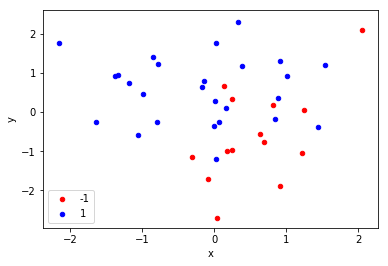

In [833]:
df = DataFrame(dict(x = x_2[:,0],y= x_2[:,1],label=y_2))
colors = {-1:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [902]:
X = np.column_stack((x_2, np.ones((n,1))))
Y = y_2.reshape(n,1)
w = np.random.rand(1,3)[0]
lamda = 0.1

In [903]:
w = np.array([ 0.72840914,  0.39679146,  0.49826612])

In [904]:
#cal the exp(-XwY)
def p(X,Y,w):
    return 1/(1+np.exp(-Y*np.dot(X,w.reshape(3,1))))

def loss(X,Y,w,n):
    J = np.sum(np.log(1/p(X,Y,w)))/n + 0.1*np.dot(w.T,w)
    return J

def grad(X,Y,w,n):
    grad = (np.sum((middle(X,Y,w)/(1+middle(X,Y,w)))*(-Y*X))/n)+2*w/Lip
    #grad = np.sum((-Y*X)*(1-p(X,Y,w)))/n+2*w/Lip
    #for i in range(n):
     #   x = np.reshape(X[i],(3,1))
      #  exp = np.exp(-Y[i]*np.dot(w,X[i]))
      #  grad += exp*(-Y[i]*
    return grad

def hessian(X,Y,w,n):
    hess = 0
    for i in range(n):
        x = np.reshape(X[i],(3,1))
        exp = np.exp(-Y[i]*np.dot(w,X[i]))
        hess += (exp/(1+exp)**2)*(np.dot(x,x.T))
    hess = hess/n + 2/Lip
    #hess =  np.sum(p(X,Y,w)*(1- p(X,Y,w))*XX)/n+2/Lip
    return hess

In [906]:
J_s_l  = []
J_n_l = []
W_s = []
W_n = []
Lip = np.max(np.linalg.eigvals(np.dot(X.T,X)+2*lamda))/4
w_s = w.copy()
w_n = w.copy()
for i in range(400):
    W_s.append(w_s)
    W_n.append(w_n)
    J_steepest = loss(X,Y,w_s,n)
    J_Newton = loss(X,Y,w_n,n)
    hessI = np.array(np.mat(hessian(X,Y,w_n,n)).I)
    w_s = w_s - (grad(X,Y,w_s,n)/Lip)
    w_n= w_n - np.dot(hessI,grad(X,Y,w_n,n))
    J_s_l.append(J_steepest)
    J_n_l.append(J_Newton)
J_steepest = loss(X,Y,w_s,n)
J_Newton = loss(X,Y,w_n,n)

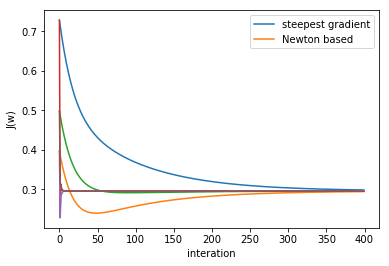

In [908]:
import matplotlib.pyplot as plt
plt.plot(J_s_l)
plt.plot(J_n_l)
plt.legend(['steepest gradient','Newton based'])
plt.xlabel('interation')
plt.ylabel('J(w)')
plt.show()